##Import all the necessary libraries and unzip the files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!unzip -uq "/content/drive/MyDrive/Case Study 1/Test_Beneficiarydata-1542969243754.csv.zip" -d "./"
!unzip -uq "/content/drive/MyDrive/Case Study 1/Test_Inpatientdata-1542969243754.csv.zip" -d "./"
!unzip -uq "/content/drive/MyDrive/Case Study 1/Test_Outpatientdata-1542969243754.csv.zip" -d "./"
!unzip -uq "/content/drive/MyDrive/Case Study 1/Train_Beneficiarydata-1542865627584.csv.zip" -d "./"
!unzip -uq "/content/drive/MyDrive/Case Study 1/Train_Inpatientdata-1542865627584.csv.zip" -d "./"
!unzip -uq "/content/drive/MyDrive/Case Study 1/Train_Outpatientdata-1542865627584.csv.zip" -d "./"

##Read all the csv files: Now we will read all the csv files and then store them in a dataframe. Also we will get the shape of each dataframe

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Case Study 1/Train-1542865627584.csv')
df_train.shape

(5410, 2)

In [4]:
df_train.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


Now we will see the distribution of the PotentialFraud to determine how the fraud providers are distributed

In [5]:
df_train.PotentialFraud.value_counts()

No     4904
Yes     506
Name: PotentialFraud, dtype: int64

In [6]:
(df_train.PotentialFraud.value_counts()/df_train.PotentialFraud.shape[0])*100

No     90.64695
Yes     9.35305
Name: PotentialFraud, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


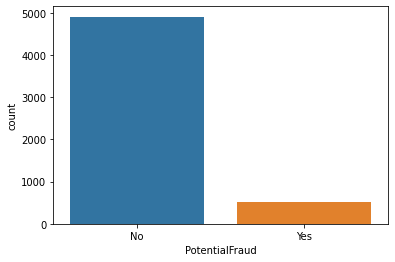

In [7]:
sns.countplot(df_train.PotentialFraud)
plt.show()

Now we have clearly analysed as well as visualized that only around 9.35% of the Providers are potential fraud provided and hence the problem is of a unbalanced dataset problem

##Analysis of the beneficiary data

In [8]:
df_train_beneficiary = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
df_train_beneficiary.shape

(138556, 25)

In [9]:
df_train_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [10]:
df_train_beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [11]:
df_train_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [12]:
df_train_beneficiary.isna().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

From the above analysis done we found that the beneficiary data in the train dataset has only one non-null feature which is DOD(Date of Date). Also this null value have a information indicating that DOD does not exist considering the person is still alive.

####Gender

In [13]:
df_train_beneficiary.Gender.value_counts()

2    79106
1    59450
Name: Gender, dtype: int64

Since the value of gender is given as 1 and 2 with 79106 belonging to Class2 and 59450 belonging to 1. We will provide a standard nomenclature of 0 to the Class 2, which is norm generally folowed

In [14]:
df_train_beneficiary.Gender = df_train_beneficiary.Gender.map({1:1,2:0})

In [15]:
df_train_beneficiary.Gender.value_counts()/df_train_beneficiary.shape[0]*100

0    57.093161
1    42.906839
Name: Gender, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


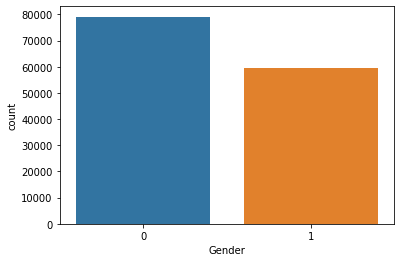

In [16]:
sns.countplot(df_train_beneficiary.Gender)
plt.show()

From the above countplot we can see that out of all the beneficiaries the distibution of gender is 57:43, which can be thought as almost a balanced distribution in terms of Gender

###Race

In [17]:
df_train_beneficiary.Race.value_counts()

1    117057
2     13538
3      5059
5      2902
Name: Race, dtype: int64

Similarly we will tag 5 as 0 just to make the dataset look into a norm that we follow

In [18]:
df_train_beneficiary.Race = df_train_beneficiary.Race.map({5:0,1:1,2:2,3:3})

In [19]:
df_train_beneficiary.Race.value_counts()/df_train_beneficiary.shape[0]*100

1    84.483530
2     9.770779
3     3.651231
0     2.094460
Name: Race, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


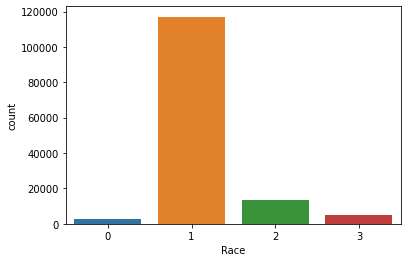

In [20]:
sns.countplot(df_train_beneficiary.Race)
plt.show()

From the above countplot it is clear that out of all the beneficiaries Race 1 is having the highest distribution, which indicates that Race1 is highest in population or it can also be possible that Race1 are mostly benefited as beneficiaries whereas other Races are deprived of the health benefits.

##Renal Disease Indicator

In [21]:
df_train_beneficiary.RenalDiseaseIndicator.value_counts()

0    118978
Y     19578
Name: RenalDiseaseIndicator, dtype: int64

#### As we can see that the values for RenalDiseaseIndicator are Y and 0, which indicates Y as Yes clearly. So we will replace the value of Y as 1

In [22]:
df_train_beneficiary.RenalDiseaseIndicator = df_train_beneficiary.RenalDiseaseIndicator.map({'0':0,'Y':1})

In [23]:
df_train_beneficiary.RenalDiseaseIndicator.value_counts()

0    118978
1     19578
Name: RenalDiseaseIndicator, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


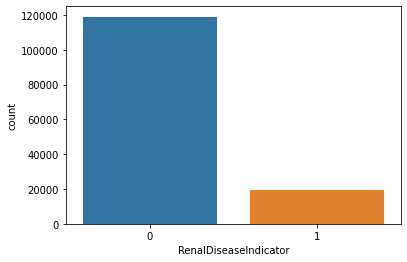

In [24]:
sns.countplot(df_train_beneficiary.RenalDiseaseIndicator)
plt.show()

#### From the analysis above for the Renal Disease Indicator we could see that most of the beneficiaries are not having RenalDiseaseIndicator. This means that the kidneys of most of the patients are working good

#State

In [25]:
print(sorted(list(df_train_beneficiary.State.value_counts().index)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54]


In [26]:
len(list(df_train_beneficiary.State.value_counts().index))

52

In [27]:
df_state = pd.DataFrame()
df_state['State'] = df_train_beneficiary.State.value_counts().index
df_state['Count'] = df_train_beneficiary.State.value_counts().values
df_state_top_20 = df_state.head(20)
df_state_top_20

,State,Count
0,5,12052
1,10,9771
2,45,8780
3,33,8443
4,39,6055
5,14,5923
6,36,5366
7,23,5293
8,34,4629
9,31,4124


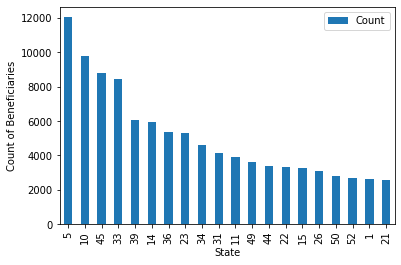

In [28]:
df_state_top_20.plot(x='State', y='Count', kind='bar')
plt.xlabel('State')
plt.ylabel('Count of Beneficiaries')
plt.show()

The bar plot above shows the count of beneficiaries for top 20 states

#NoOfMonths_PartACov

In [29]:
df_train_beneficiary.NoOfMonths_PartACov.value_counts()

12    137389
0       1000
6         38
11        28
8         26
10        18
7         16
4         13
5          8
9          7
3          5
2          5
1          3
Name: NoOfMonths_PartACov, dtype: int64

In [30]:
df_train_beneficiary.NoOfMonths_PartACov.value_counts()/df_train_beneficiary.NoOfMonths_PartACov.shape

12    0.991577
0     0.007217
6     0.000274
11    0.000202
8     0.000188
10    0.000130
7     0.000115
4     0.000094
5     0.000058
9     0.000051
3     0.000036
2     0.000036
1     0.000022
Name: NoOfMonths_PartACov, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


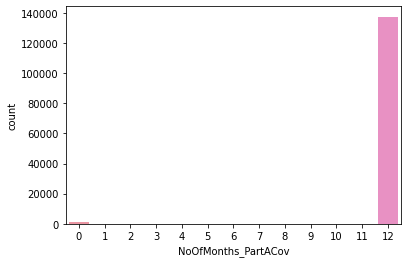

In [31]:
sns.countplot(df_train_beneficiary.NoOfMonths_PartACov)
plt.show()

#### From the analysis we can see that more than 99% of the beneficiaries have No of Months for Part A coverage to be 12 months. Only a few beneficiaries are involved with coverage for less than 12 months

# NoOfMonths_PartBCov

In [32]:
df_train_beneficiary.NoOfMonths_PartBCov.value_counts()

12    136902
0        675
6        282
10       150
11       143
9        122
8         71
7         63
5         50
4         35
3         27
2         19
1         17
Name: NoOfMonths_PartBCov, dtype: int64

In [33]:
df_train_beneficiary.NoOfMonths_PartBCov.value_counts()/df_train_beneficiary.NoOfMonths_PartBCov.shape

12    0.988063
0     0.004872
6     0.002035
10    0.001083
11    0.001032
9     0.000881
8     0.000512
7     0.000455
5     0.000361
4     0.000253
3     0.000195
2     0.000137
1     0.000123
Name: NoOfMonths_PartBCov, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


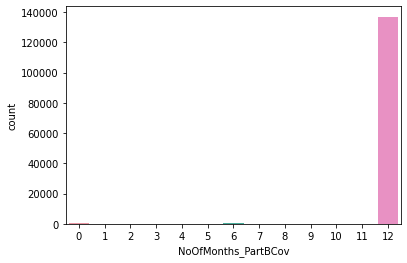

In [34]:
sns.countplot(df_train_beneficiary.NoOfMonths_PartBCov)
plt.show()

#### Now from the analysis of NoOfMonths_PartACov and NoOfMonths_PartBCov we see that both the features have 99% of the values as 12 months and 1% as other values. So we can get a glimpse that if we find out the corelation between these two features then they are likely to be highly corellated and we can remove one of the column later

#ChronicCond_Alzheimer

In [35]:
df_train_beneficiary.ChronicCond_Alzheimer.value_counts()

2    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64

In [36]:
df_train_beneficiary.ChronicCond_Alzheimer.value_counts()/df_train_beneficiary.ChronicCond_Alzheimer.shape

2    0.667817
1    0.332183
Name: ChronicCond_Alzheimer, dtype: float64

##### Since it is commonsensicle that people with Alzheimers will be less as compared to those who are not suffering from it. So we can map 2 as 0

In [37]:
df_train_beneficiary.ChronicCond_Alzheimer = df_train_beneficiary.ChronicCond_Alzheimer.apply(lambda x:0 if int(x)==2 else 1)

In [38]:
df_train_beneficiary.ChronicCond_Alzheimer.value_counts()

0    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


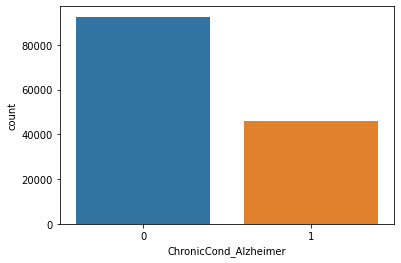

In [39]:
sns.countplot(df_train_beneficiary.ChronicCond_Alzheimer)
plt.show()

# ChronicCond_Heartfailure

In [40]:
df_train_beneficiary.ChronicCond_Heartfailure.value_counts()

2    70154
1    68402
Name: ChronicCond_Heartfailure, dtype: int64

### Similarly as done previously we will tag 2 as 0

In [41]:
df_train_beneficiary.ChronicCond_Heartfailure = df_train_beneficiary.ChronicCond_Heartfailure.apply(lambda x:int(x) if x==1 else 0)

In [42]:
df_train_beneficiary.ChronicCond_Heartfailure.value_counts()

0    70154
1    68402
Name: ChronicCond_Heartfailure, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


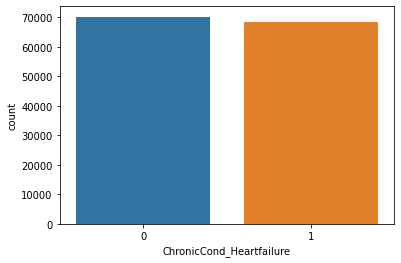

In [43]:
sns.countplot(df_train_beneficiary.ChronicCond_Heartfailure)
plt.show()

### From the above analysis we could see that the beneficiaries are having equal likelihood to have a heart condition as the distribution for Chronic Heart Failure is almost equal

# ChronicCond_KidneyDisease

In [44]:
df_train_beneficiary.ChronicCond_KidneyDisease.value_counts()

2    95277
1    43279
Name: ChronicCond_KidneyDisease, dtype: int64

### Similarly as done previously we will tag 2 as 0

In [45]:
df_train_beneficiary.ChronicCond_KidneyDisease = df_train_beneficiary.ChronicCond_KidneyDisease.apply(lambda x:int(x) if x==1 else 0)

In [46]:
df_train_beneficiary.ChronicCond_KidneyDisease.value_counts()

0    95277
1    43279
Name: ChronicCond_KidneyDisease, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


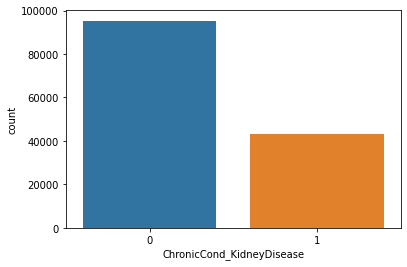

In [47]:
sns.countplot(df_train_beneficiary.ChronicCond_KidneyDisease)
plt.show()

### From the above analysis we could see that the beneficiaries having kidney disease and the beneficiaries having renel condition almost share the same kind of distribution. Later we could find out the correlation between these two columns and delete one of them if they are highly correlated

# ChronicCond_Cancer

In [48]:
df_train_beneficiary.ChronicCond_Cancer.value_counts()

2    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64

### Similarly as done previously we will tag 2 as 0

In [49]:
df_train_beneficiary.ChronicCond_Cancer = df_train_beneficiary.ChronicCond_Cancer.apply(lambda x:int(x) if x==1 else 0)

In [50]:
df_train_beneficiary.ChronicCond_Cancer.value_counts()

0    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


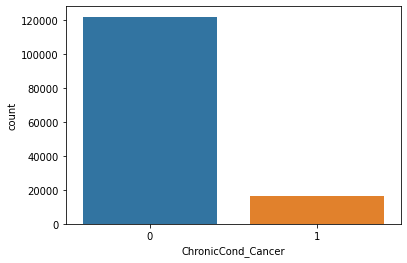

In [51]:
sns.countplot(df_train_beneficiary.ChronicCond_Cancer)
plt.show()

### From the above analysis we could see that the count of beneficiaries which are having cancer are very very less than those which are not having.

# ChronicCond_ObstrPulmonary

In [52]:
df_train_beneficiary.ChronicCond_ObstrPulmonary.value_counts()

2    105697
1     32859
Name: ChronicCond_ObstrPulmonary, dtype: int64

### Similarly as done previously we will tag 2 as 0

In [53]:
df_train_beneficiary.ChronicCond_ObstrPulmonary = df_train_beneficiary.ChronicCond_ObstrPulmonary.apply(lambda x:int(x) if x==1 else 0)

In [54]:
df_train_beneficiary.ChronicCond_Cancer.value_counts()

0    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


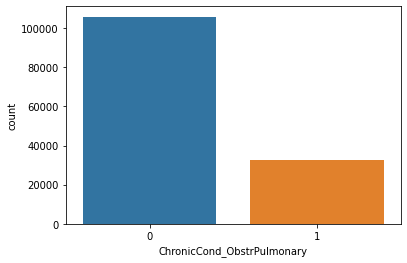

In [55]:
sns.countplot(df_train_beneficiary.ChronicCond_ObstrPulmonary)
plt.show()

### From the above analysis we could see that the count of beneficiaries which are having obstruction in the lungs are also less as compared to those which are not having it.

# ChronicCond_Depression

In [56]:
df_train_beneficiary.ChronicCond_Depression.value_counts()

2    89296
1    49260
Name: ChronicCond_Depression, dtype: int64

### Similarly as done previously we will tag 2 as 0

In [57]:
df_train_beneficiary.ChronicCond_Depression = df_train_beneficiary.ChronicCond_Depression.apply(lambda x:int(x) if x==1 else 0)

In [58]:
df_train_beneficiary.ChronicCond_Depression.value_counts()

0    89296
1    49260
Name: ChronicCond_Depression, dtype: int64

In [59]:
df_train_beneficiary.ChronicCond_Depression.value_counts()/df_train_beneficiary.shape[0]*100

0    64.447588
1    35.552412
Name: ChronicCond_Depression, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


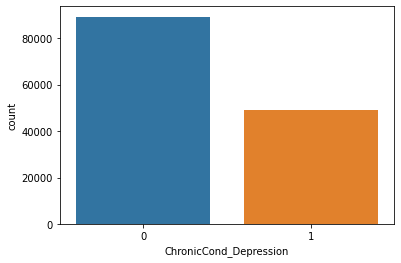

In [60]:
sns.countplot(df_train_beneficiary.ChronicCond_Depression)
plt.show()

### From the above analysis we could see that the around one third of the beneficiaries are suffering from depression

# ChronicCond_Diabetes

In [61]:
df_train_beneficiary.ChronicCond_Diabetes.value_counts()

1    83391
2    55165
Name: ChronicCond_Diabetes, dtype: int64

### Similarly as done previously we will tag 2 as 0

In [62]:
df_train_beneficiary.ChronicCond_Diabetes = df_train_beneficiary.ChronicCond_Diabetes.apply(lambda x:int(x) if x==1 else 0)

In [63]:
df_train_beneficiary.ChronicCond_Diabetes.value_counts()

1    83391
0    55165
Name: ChronicCond_Diabetes, dtype: int64

In [64]:
df_train_beneficiary.ChronicCond_Diabetes.value_counts()/df_train_beneficiary.shape[0]*100

1    60.185773
0    39.814227
Name: ChronicCond_Diabetes, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


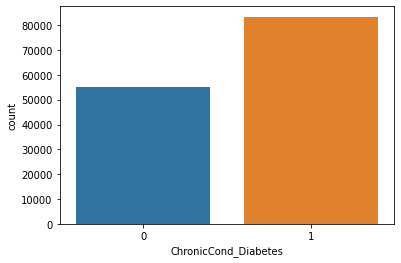

In [65]:
sns.countplot(df_train_beneficiary.ChronicCond_Diabetes)
plt.show()

#### It can be seen from the analysis that the count of the beneficiaries which are diabetic is high as compared to those who are not having it. And this is an opposite trend which we can see with respect to other diseases, where the condition of not having the disease was higher. However being diabetic is common now a days so that might be the reason for beneficiaries recorded with diabetes are high

# ChronicCond_IschemicHeart

In [66]:
df_train_beneficiary.ChronicCond_IschemicHeart.value_counts()

1    93644
2    44912
Name: ChronicCond_IschemicHeart, dtype: int64

### Similarly as done previously we will tag 2 as 0

In [67]:
df_train_beneficiary.ChronicCond_IschemicHeart = df_train_beneficiary.ChronicCond_IschemicHeart.apply(lambda x:int(x) if x==1 else 0)

In [68]:
df_train_beneficiary.ChronicCond_IschemicHeart.value_counts()

1    93644
0    44912
Name: ChronicCond_IschemicHeart, dtype: int64

In [69]:
df_train_beneficiary.ChronicCond_IschemicHeart.value_counts()/df_train_beneficiary.shape[0]*100

1    67.585669
0    32.414331
Name: ChronicCond_IschemicHeart, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


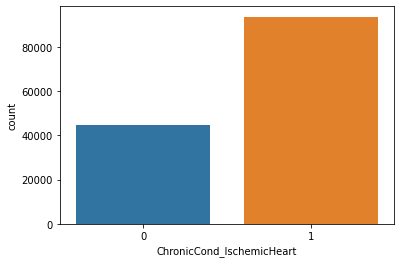

In [70]:
sns.countplot(df_train_beneficiary.ChronicCond_IschemicHeart)
plt.show()

#### It can be seen from the analysis that the count of the beneficiaries which are having ChronicCond_IschemicHeart is high as compared to those who are not having it. Almost two third of the beneficiaries are having this condition i.e the arteries of the beneficieries are blocked and they are in higher risk of heart failure

# ChronicCond_Osteoporasis

In [71]:
df_train_beneficiary.ChronicCond_Osteoporasis.value_counts()

2    100497
1     38059
Name: ChronicCond_Osteoporasis, dtype: int64

### Similarly as done previously we will tag 2 as 0

In [72]:
df_train_beneficiary.ChronicCond_Osteoporasis = df_train_beneficiary.ChronicCond_Osteoporasis.apply(lambda x:int(x) if x==1 else 0)

In [73]:
df_train_beneficiary.ChronicCond_Osteoporasis.value_counts()

0    100497
1     38059
Name: ChronicCond_Osteoporasis, dtype: int64

In [74]:
df_train_beneficiary.ChronicCond_Osteoporasis.value_counts()/df_train_beneficiary.shape[0]*100

0    72.531684
1    27.468316
Name: ChronicCond_Osteoporasis, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


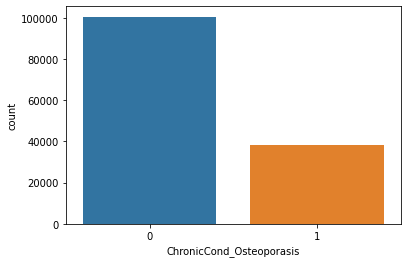

In [75]:
sns.countplot(df_train_beneficiary.ChronicCond_Osteoporasis)
plt.show()

#### So we are back to the trend again where the distribution of beneficiaries suffering from a condition is less than the one who are not suffering it. In terms of ChronicCond_Osteoporasis around one-fourth of the beneficiaries are suffering from the condition. Osteoporasis refers to a condition where the patient suffer from lower bone mass

# ChronicCond_rheumatoidarthritis

In [76]:
df_train_beneficiary.ChronicCond_rheumatoidarthritis.value_counts()

2    102972
1     35584
Name: ChronicCond_rheumatoidarthritis, dtype: int64

### Similarly as done previously we will tag 2 as 0

In [77]:
df_train_beneficiary.ChronicCond_rheumatoidarthritis = df_train_beneficiary.ChronicCond_rheumatoidarthritis.apply(lambda x:int(x) if x==1 else 0)

In [78]:
df_train_beneficiary.ChronicCond_rheumatoidarthritis.value_counts()

0    102972
1     35584
Name: ChronicCond_rheumatoidarthritis, dtype: int64

In [79]:
df_train_beneficiary.ChronicCond_rheumatoidarthritis.value_counts()/df_train_beneficiary.shape[0]*100

0    74.317965
1    25.682035
Name: ChronicCond_rheumatoidarthritis, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


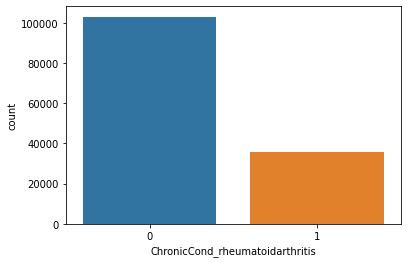

In [80]:
sns.countplot(df_train_beneficiary.ChronicCond_rheumatoidarthritis)
plt.show()

#### For ChronicCond_rheumatoidarthritis also we could see that around one fourth of the beneficiaries are having this condition and the distribution looks similar to the Osteoporasis. Since both ChronicCond_rheumatoidarthritis and ChronicCond_Osteoporasis are related to bone, so there might be chances that these two features are corellated which we will find out later and remove one of the feature if they are correlated

# ChronicCond_stroke

In [81]:
df_train_beneficiary.ChronicCond_stroke.value_counts()

2    127602
1     10954
Name: ChronicCond_stroke, dtype: int64

### Similarly as done previously we will tag 2 as 0

In [82]:
df_train_beneficiary.ChronicCond_stroke = df_train_beneficiary.ChronicCond_stroke.apply(lambda x:int(x) if x==1 else 0)

In [83]:
df_train_beneficiary.ChronicCond_stroke.value_counts()

0    127602
1     10954
Name: ChronicCond_stroke, dtype: int64

In [84]:
df_train_beneficiary.ChronicCond_stroke.value_counts()/df_train_beneficiary.shape[0]*100

0    92.094171
1     7.905829
Name: ChronicCond_stroke, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


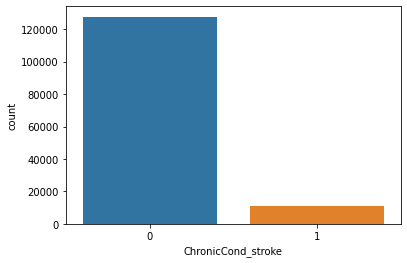

In [85]:
sns.countplot(df_train_beneficiary.ChronicCond_stroke)
plt.show()

#### ChronicCond_stroke refers to the condition of the initial six months from the first stroke have occured and there are 8% of beneficiaries which are having ChronicCond_stroke.

# IPAnnualReimbursementAmt, IPAnnualDeductibleAmt, OPAnnualReimbursementAmt and OPAnnualDeductibleAmt

In [86]:
df_train_beneficiary[['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']].describe()

,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000
mean,3660.346502,399.847296,1298.219348,377.718258
std,9568.621827,956.175202,2493.901134,645.530187
min,-8000.000000,0.000000,-70.000000,0.000000
25%,0.000000,0.000000,170.000000,40.000000
50%,0.000000,0.000000,570.000000,170.000000
75%,2280.000000,1068.000000,1500.000000,460.000000
max,161470.000000,38272.000000,102960.000000,13840.000000


#### We have analysed the four numerical features in the Benefeciaries data for which the results can be seen in the table above.
#### We could see that the ratio of mean of IPAnnualDeductibleAmt to the mean of IPAnnualReimbursementAmt is lower as compared to the ratio of mean of OPAnnualDeductibleAmt to the mean of OPAnnualReimbursementAmt

# Analysis of the Inpatient data: Inpatient refers to those patient who gets admitted to the hospital in order to get treatment

In [87]:
df_train_inpatient = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
df_train_inpatient.shape

(40474, 30)

In [88]:
df_train_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [89]:
df_train_inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [90]:
df_train_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [91]:
df_train_inpatient.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


In [92]:
(df_train_inpatient.isna().sum()/df_train_inpatient.shape[0])*100

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.276721
OperatingPhysician         41.122696
OtherPhysician             88.412314
AdmissionDt                 0.000000
ClmAdmitDiagnosisCode       0.000000
DeductibleAmtPaid           2.221179
DischargeDt                 0.000000
DiagnosisGroupCode          0.000000
ClmDiagnosisCode_1          0.000000
ClmDiagnosisCode_2          0.558383
ClmDiagnosisCode_3          1.670208
ClmDiagnosisCode_4          3.790087
ClmDiagnosisCode_5          7.150269
ClmDiagnosisCode_6         11.953353
ClmDiagnosisCode_7         17.932500
ClmDiagnosisCode_8         24.563918
ClmDiagnosisCode_9         33.347334
ClmDiagnosisCode_10        90.297475
ClmProcedureCode_1         42.807728
ClmProcedureCode_2         86.524683
ClmProcedureCode_3         97.615753
C

## Inpatient Data Procedures analysis

In [93]:
df_procedures_inpatient =  pd.DataFrame()
df_procedures_inpatient['Procedure']=pd.concat([df_train_inpatient["ClmProcedureCode_1"], df_train_inpatient["ClmProcedureCode_2"], df_train_inpatient["ClmProcedureCode_3"], \
                                                df_train_inpatient["ClmProcedureCode_4"], df_train_inpatient["ClmProcedureCode_5"], df_train_inpatient["ClmProcedureCode_6"]], \
                                               axis=0, sort=True).dropna()
df_procedures_inpatient.head()

,Procedure
1,7092.0
3,331.0
4,3893.0
5,863.0
6,4576.0


In [94]:
df_procedures_inpatient.value_counts()

Procedure
4019.0       1953
9904.0       1137
2724.0       1047
8154.0       1021
66.0          894
             ... 
8204.0          1
4444.0          1
4461.0          1
4468.0          1
11.0            1
Length: 1321, dtype: int64

### We could see that there are 1321 distinct procedures in the inpatient data. Now let us find how much percentage of the total procedures the top 20 procedures occupies

In [95]:
round(df_procedures_inpatient.value_counts()[0:20].values.sum()/df_procedures_inpatient.value_counts().values.sum()*100,4)

42.439

###We could see that around 42.44% of the total procedure is been occupied by the top 20 procedures

In [96]:
top_20_procedures = df_procedures_inpatient.value_counts().head(20)

In [97]:
top_20_procedures

Procedure
4019.0       1953
9904.0       1137
2724.0       1047
8154.0       1021
66.0          894
3893.0        849
3995.0        805
4516.0        643
3722.0        581
8151.0        462
8872.0        409
9671.0        401
4513.0        362
5849.0        337
9390.0        330
9672.0        302
5123.0        283
7935.0        277
8152.0        256
9339.0        252
dtype: int64

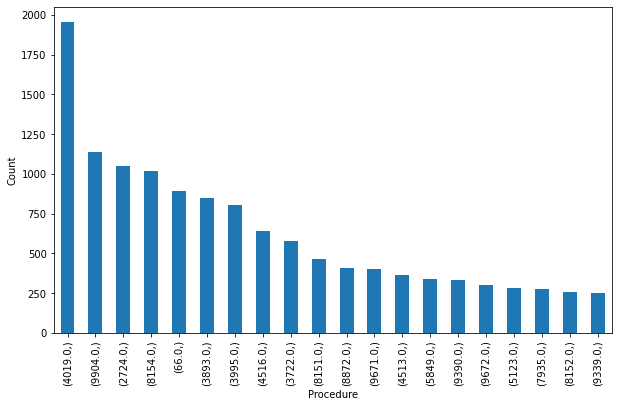

In [98]:
plt.figure(figsize=(10,6))
top_20_procedures.plot(kind='bar')
plt.ylabel('Count')
plt.show()

## Inpatient Data Diagnosis analysis

In [99]:
df_diagnosis_inpatient =  pd.DataFrame()
df_diagnosis_inpatient['Diagnosis']=pd.concat([df_train_inpatient["ClmDiagnosisCode_1"], df_train_inpatient["ClmDiagnosisCode_2"], df_train_inpatient["ClmDiagnosisCode_3"], \
                                                df_train_inpatient["ClmDiagnosisCode_4"], df_train_inpatient["ClmDiagnosisCode_5"], df_train_inpatient["ClmDiagnosisCode_6"], \
                                                df_train_inpatient["ClmDiagnosisCode_7"],df_train_inpatient["ClmDiagnosisCode_8"],df_train_inpatient["ClmDiagnosisCode_9"], \
                                                df_train_inpatient["ClmDiagnosisCode_10"]], 
                                               axis=0, sort=True).dropna()
df_diagnosis_inpatient.head()

,Diagnosis
0,1970
1,6186
2,29623
3,43491
4,042


In [100]:
df_diagnosis_inpatient.value_counts()

Diagnosis
4019         14153
2724          7340
25000         7334
41401         6442
4280          6190
             ...  
75981            1
76071            1
2776             1
7707             1
7913             1
Length: 4716, dtype: int64

### We could see that there are 4716 distinct diagnosis code in the inpatient data. Now let us find how much percentage of the total procedures the top 80 diagnosis code occupies

In [101]:
round(df_diagnosis_inpatient.value_counts()[0:80].values.sum()/df_diagnosis_inpatient.value_counts().values.sum()*100,4)

51.746

###We could see that around 51.75% of the total diagnosis code is been occupied by the top 80 diagnosis codes

In [102]:
top_80_diagnosis_codes = df_diagnosis_inpatient.value_counts().head(80)

In [103]:
top_80_diagnosis_codes

Diagnosis
4019         14153
2724          7340
25000         7334
41401         6442
4280          6190
             ...  
5533           787
V5867          771
79902          767
42732          737
V1251          722
Length: 80, dtype: int64

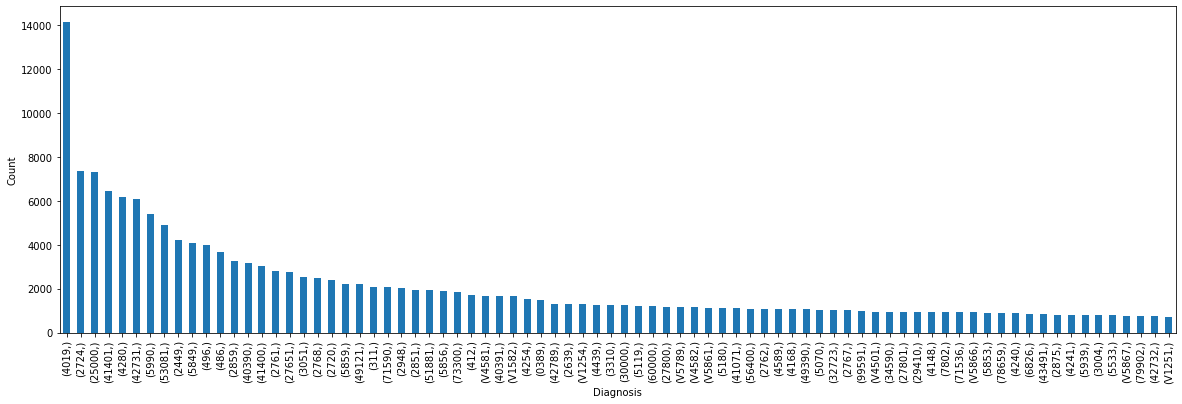

In [104]:
plt.figure(figsize=(20,6))
top_80_diagnosis_codes.plot(kind='bar')
plt.ylabel('Count')
plt.show()

### From the above Procedures and Diagnosis codes analysis we could see that the most common procedures are 4019, 9919, 2724 and 8154<br>
### Also the most common diagnosis codes are 4019, 2724, 25000 and 41401

#Analysing Outpatient data

In [105]:
df_train_outpatient = pd.read_csv('Train_Outpatientdata-1542865627584.csv')
df_train_outpatient.shape

(517737, 27)

In [106]:
df_train_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [107]:
df_train_outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [108]:
df_train_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [109]:
(df_train_outpatient.isna().sum()/df_train_outpatient.shape[0])*100

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.269635
OperatingPhysician         82.497484
OtherPhysician             62.327205
ClmDiagnosisCode_1          2.018979
ClmDiagnosisCode_2         37.737307
ClmDiagnosisCode_3         60.741264
ClmDiagnosisCode_4         75.741351
ClmDiagnosisCode_5         85.640586
ClmDiagnosisCode_6         90.582864
ClmDiagnosisCode_7         93.633640
ClmDiagnosisCode_8         95.574587
ClmDiagnosisCode_9         97.134066
ClmDiagnosisCode_10        99.790820
ClmProcedureCode_1         99.968710
ClmProcedureCode_2         99.993047
ClmProcedureCode_3         99.999227
ClmProcedureCode_4         99.999614
ClmProcedureCode_5        100.000000
ClmProcedureCode_6        100.000000
DeductibleAmtPaid           0.000000
ClmAdmitDiagnosisCode      79.637345
d

In the outpatient data for the training dataset we could see almost all of the columns related to ClmProcedureCode are having null values. Also a major part of values related to ClmDiagnosisCode are also having null values

## Inpatient Data Procedures analysis

In [110]:
df_procedures_outpatient =  pd.DataFrame()
df_procedures_outpatient['Procedure']=pd.concat([df_train_outpatient["ClmProcedureCode_1"], df_train_outpatient["ClmProcedureCode_2"], df_train_outpatient["ClmProcedureCode_3"], \
                                                df_train_outpatient["ClmProcedureCode_4"], df_train_outpatient["ClmProcedureCode_5"], df_train_outpatient["ClmProcedureCode_6"]], \
                                               axis=0, sort=True).dropna()
df_procedures_outpatient.head()

,Procedure
8167,9672.0
9326,4573.0
14740,66.0
30435,66.0
35839,5123.0


In [111]:
df_procedures_outpatient.value_counts()

Procedure
9904.0       15
4516.0        8
3722.0        8
66.0          7
5123.0        7
             ..
7804.0        1
7862.0        1
7915.0        1
7931.0        1
5185.0        1
Length: 104, dtype: int64

### We could see that there are 104 distinct procedures in the outpatient data. Now let us find how much percentage of the total procedures the top 20 procedures occupies

In [112]:
round(df_procedures_outpatient.value_counts()[0:20].values.sum()/df_procedures_outpatient.value_counts().values.sum()*100,4)

51.9608

###We could see that around 52% of the total procedure is been occupied by the top 20 procedures

In [113]:
top_20_procedures_outpatient = df_procedures_outpatient.value_counts().head(20)

In [114]:
top_20_procedures_outpatient

Procedure
9904.0       15
4516.0        8
3722.0        8
66.0          7
5123.0        7
2724.0        7
4019.0        6
9952.0        5
3893.0        5
9672.0        5
9955.0        4
8152.0        4
8622.0        4
3995.0        4
3895.0        3
8703.0        3
966.0         3
4513.0        3
9390.0        3
51.0          2
dtype: int64

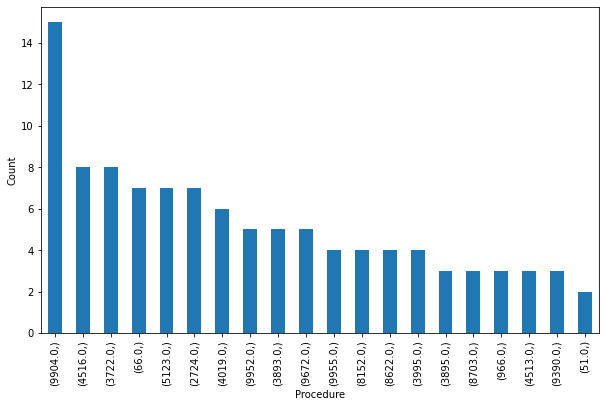

In [115]:
plt.figure(figsize=(10,6))
top_20_procedures_outpatient.plot(kind='bar')
plt.ylabel('Count')
plt.show()

## Outpatient Data Diagnosis analysis

In [116]:
df_diagnosis_outpatient =  pd.DataFrame()
df_diagnosis_outpatient['Diagnosis']=pd.concat([df_train_outpatient["ClmDiagnosisCode_1"], df_train_outpatient["ClmDiagnosisCode_2"], df_train_outpatient["ClmDiagnosisCode_3"], \
                                                df_train_outpatient["ClmDiagnosisCode_4"], df_train_outpatient["ClmDiagnosisCode_5"], df_train_outpatient["ClmDiagnosisCode_6"], \
                                                df_train_outpatient["ClmDiagnosisCode_7"],df_train_outpatient["ClmDiagnosisCode_8"],df_train_outpatient["ClmDiagnosisCode_9"], \
                                                df_train_outpatient["ClmDiagnosisCode_10"]], 
                                               axis=0, sort=True).dropna()
df_diagnosis_outpatient.head()

,Diagnosis
0,78943
1,6115
2,2723
3,71988
4,82382


In [117]:
df_diagnosis_outpatient.value_counts()

Diagnosis
4019         62903
25000        30022
2724         28423
V5869        24359
4011         23534
             ...  
66551            1
66564            1
66582            1
66624            1
94448            1
Length: 10846, dtype: int64

### We could see that there are 10846 distinct diagnosis code in the outpatient data. Now let us find how much percentage of the total procedures the top 80 diagnosis code occupies

In [118]:
round(df_diagnosis_outpatient.value_counts()[0:80].values.sum()/df_diagnosis_outpatient.value_counts().values.sum()*100,4)

39.2267

###We could see that around 39.22% of the total diagnosis code is been occupied by the top 80 diagnosis codes

In [119]:
top_80_diagnosis_codes_outpatient = df_diagnosis_outpatient.value_counts().head(80)

In [120]:
top_80_diagnosis_codes_outpatient

Diagnosis
4019         62903
25000        30022
2724         28423
V5869        24359
4011         23534
             ...  
V4589         2393
78651         2360
7840          2345
7231          2307
25001         2303
Length: 80, dtype: int64

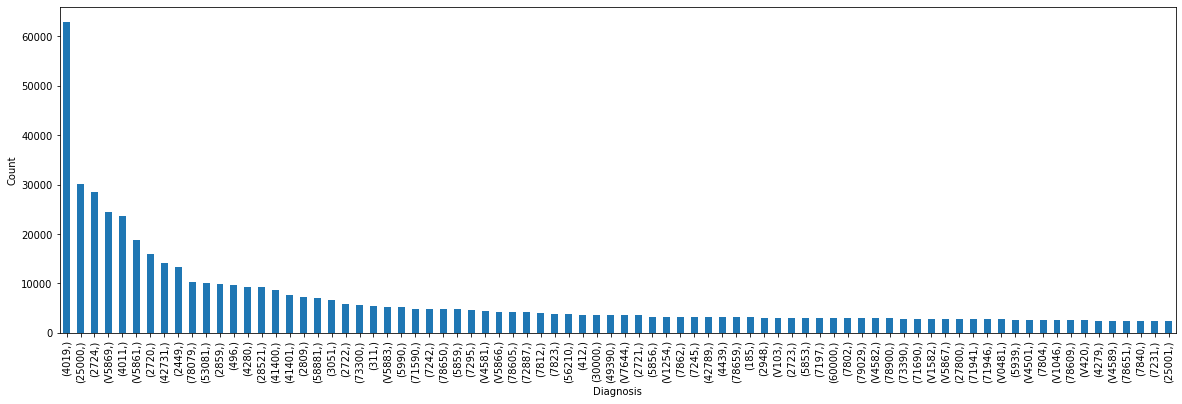

In [121]:
plt.figure(figsize=(20,6))
top_80_diagnosis_codes_outpatient.plot(kind='bar')
plt.ylabel('Count')
plt.show()

### From the above Procedures and Diagnosis codes analysis we could see that the most common procedures are 9904, 4516, 3722 and 66<br>
### Also the most common diagnosis codes are 4019, 25000, 2724 and V5869

# Reading the test datasets

In [122]:
df_test = pd.read_csv('/content/drive/MyDrive/Case Study 1/Test-1542969243754.csv')
df_test.shape

(1353, 1)

In [123]:
df_test_beneficiary = pd.read_csv('Test_Beneficiarydata-1542969243754.csv')
df_test_beneficiary.shape

(63968, 25)

In [124]:
df_test_inpatient = pd.read_csv('Test_Inpatientdata-1542969243754.csv')
df_test_inpatient.shape

(9551, 30)

In [125]:
df_test_outpatient = pd.read_csv('Test_Outpatientdata-1542969243754.csv')
df_test_outpatient.shape

(125841, 27)

#Merge the dataset

In [126]:
in_out_patien_df = pd.merge(df_train_inpatient, df_train_outpatient, on=[i for i in df_train_inpatient if i in df_train_outpatient],how='outer')

In [127]:
in_out_patien_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  558211 non-null  object 
 1   ClaimID                 558211 non-null  object 
 2   ClaimStartDt            558211 non-null  object 
 3   ClaimEndDt              558211 non-null  object 
 4   Provider                558211 non-null  object 
 5   InscClaimAmtReimbursed  558211 non-null  int64  
 6   AttendingPhysician      556703 non-null  object 
 7   OperatingPhysician      114447 non-null  object 
 8   OtherPhysician          199736 non-null  object 
 9   AdmissionDt             40474 non-null   object 
 10  ClmAdmitDiagnosisCode   145899 non-null  object 
 11  DeductibleAmtPaid       557312 non-null  float64
 12  DischargeDt             40474 non-null   object 
 13  DiagnosisGroupCode      40474 non-null   object 
 14  ClmDiagnosisCode_1  

In [128]:
data_df = pd.merge(in_out_patien_df, df_train_beneficiary,on='BeneID',how='inner')

In [129]:
data_df_final = pd.merge(data_df, df_train,on='Provider',how='inner')

In [130]:
data_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

In [131]:
data_df_final.isnull().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

In [132]:
data_df_final.isnull().sum()/data_df.shape[0]

BeneID                             0.000000
ClaimID                            0.000000
ClaimStartDt                       0.000000
ClaimEndDt                         0.000000
Provider                           0.000000
InscClaimAmtReimbursed             0.000000
AttendingPhysician                 0.002701
OperatingPhysician                 0.794975
OtherPhysician                     0.642185
AdmissionDt                        0.927493
ClmAdmitDiagnosisCode              0.738631
DeductibleAmtPaid                  0.001611
DischargeDt                        0.927493
DiagnosisGroupCode                 0.927493
ClmDiagnosisCode_1                 0.018726
ClmDiagnosisCode_2                 0.350416
ClmDiagnosisCode_3                 0.564582
ClmDiagnosisCode_4                 0.705244
ClmDiagnosisCode_5                 0.799495
ClmDiagnosisCode_6                 0.848817
ClmDiagnosisCode_7                 0.881448
ClmDiagnosisCode_8                 0.904258
ClmDiagnosisCode_9              

In [133]:
data_df_final.PotentialFraud.value_counts()/data_df_final.shape[0]

No     0.618789
Yes    0.381211
Name: PotentialFraud, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


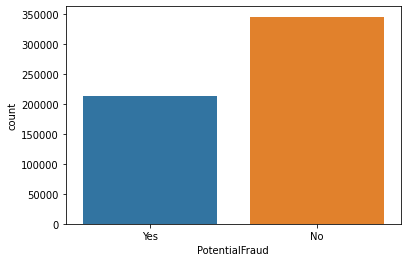

In [134]:
sns.countplot(data_df_final.PotentialFraud)
plt.show()

### This seems to be a very critical insight. When we individually found out the percentage of the healthcare providers then we got that around 9% of them were fraud. However when it comes to the count of performing fraudulant activities we can see that 38.12% of the total claims are fraud. These 38.12% of the fraud is been done by those 9% of the providers which seems to be alarming

# Impute missing values of the DOD column: We could see lot of values in the DOD columns are null, which indicates that most of the benefiuciaries are still alive and thus we will replace these two columns with the new column as Age which will give us the age of the beneficiary.

In [135]:
data_df_final['ClaimEndDt']

0         2009-04-18
1         2009-09-06
2         2009-02-01
3         2009-11-04
4         2009-10-29
             ...    
558206    2009-06-04
558207    2009-02-08
558208    2009-07-29
558209    2009-04-16
558210    2009-09-20
Name: ClaimEndDt, Length: 558211, dtype: object

In [136]:
data_df_final['ClaimStartDt'] = pd.to_datetime(data_df_final['ClaimStartDt'],format = '%Y-%m-%d',errors='ignore')
data_df_final['ClaimEndDt'] = pd.to_datetime(data_df_final['ClaimEndDt'],format = '%Y-%m-%d',errors='ignore')
data_df_final['AdmissionDt'] = pd.to_datetime(data_df_final['AdmissionDt'],format = '%Y-%m-%d',errors='ignore')
data_df_final['DischargeDt'] = pd.to_datetime(data_df_final['DischargeDt'],format = '%Y-%m-%d',errors='ignore')
data_df_final['DOB'] = pd.to_datetime(data_df_final['DOB'] , format = '%Y-%m-%d', errors='ignore')
data_df_final['DOD'] = pd.to_datetime(data_df_final['DOD'],format = '%Y-%m-%d',errors='ignore')

In [137]:
data_df_final['Age'] = round(((data_df_final['DOD'] - data_df_final['DOB']).dt.days)/365)

##### Now we have got the Age of the people who are dead. But the Age column will be having NaN values for those who are still alive. For that we will find out the latest date which could be nearer to the latest Claim End Date

In [138]:
data_df_final['ClaimEndDt'].max()

Timestamp('2009-12-31 00:00:00')

So here we can see that the last Claim Date that is present is 31/12/2009. So we will take this as a reference to find out the Age of the beneficiaries

In [139]:
data_df_final['Age'] = data_df_final['Age'].fillna(round(((pd.to_datetime('2009-12-31' , format = '%Y-%m-%d') - data_df_final['DOB']).dt.days)/365)).astype('int32')

In [140]:
data_df_final['Age'].isna().sum()

0

#### Now we are left with zero null values in the Age column and we would now move forward and create a binary variable column which will signify whether is person is dead or not

In [141]:
data_df_final['is_dead'] = data_df_final['DOD'].isna().map({True:0,False:1})

#### Since we have derived the Age and is_dead features from DOD and DOB columns we could now drop these columns

In [142]:
data_df_final.drop(['DOD','DOB'], axis=1,inplace=True)

### Since we have transformed the DOD and DOB columns to Age and is_dead features. Let us now see how they are related to the ProviderFraud column

In [143]:
data_df_final[data_df_final['PotentialFraud']=='Yes'].groupby('Age').count()['PotentialFraud']

Age
26      105
27      269
28      307
29      326
30      314
       ... 
97     1396
98     1244
99     1198
100    1323
101     666
Name: PotentialFraud, Length: 76, dtype: int64

In [144]:
data_df_final.groupby('Age').count()['PotentialFraud']

Age
26      307
27      648
28      814
29      922
30      750
       ... 
97     3530
98     3155
99     3221
100    3186
101    1917
Name: PotentialFraud, Length: 76, dtype: int64

In [145]:
(data_df_final[data_df_final['PotentialFraud']=='Yes'].groupby('Age').count()['PotentialFraud']/data_df_final.groupby('Age').count()['PotentialFraud']*100)

Age
26     34.201954
27     41.512346
28     37.714988
29     35.357918
30     41.866667
         ...    
97     39.546742
98     39.429477
99     37.193418
100    41.525424
101    34.741784
Name: PotentialFraud, Length: 76, dtype: float64

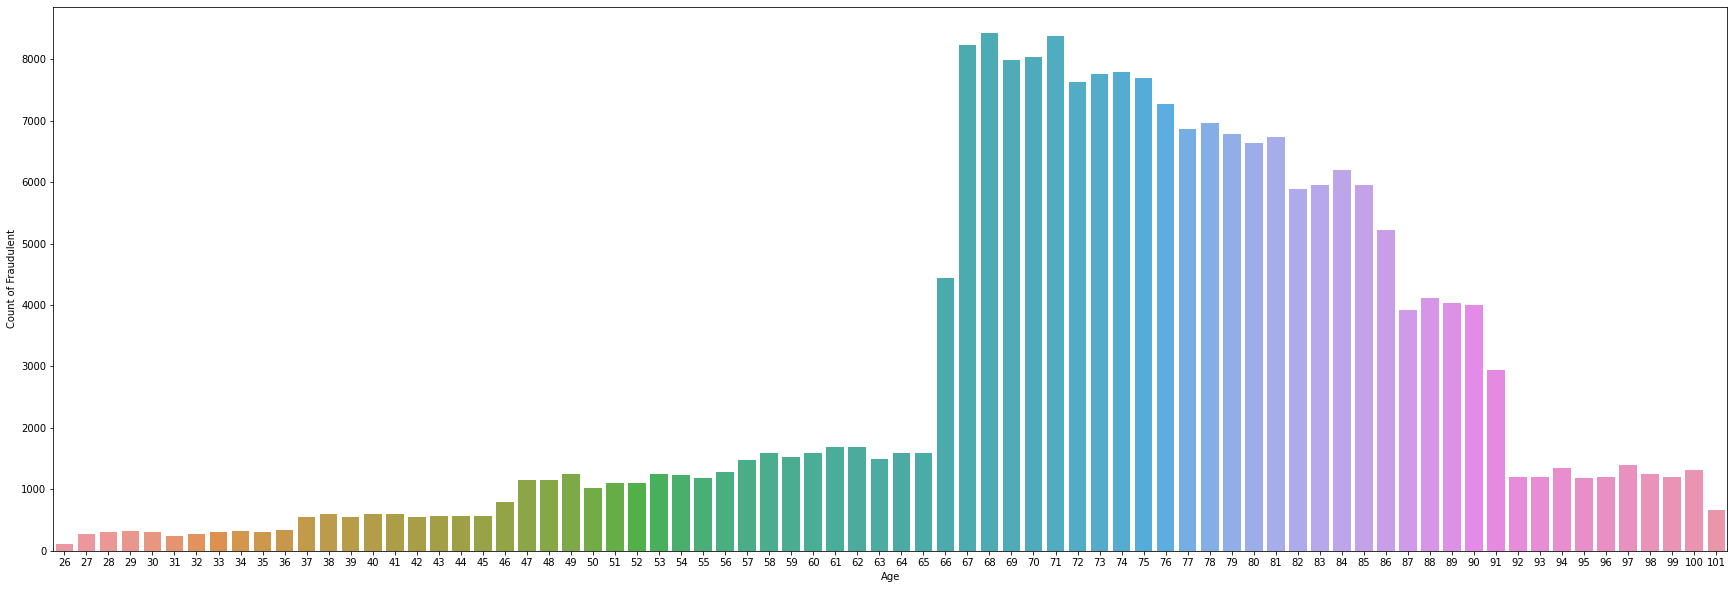

In [146]:
plt.figure(figsize=(30,10))
sns.barplot(x=data_df_final[data_df_final['PotentialFraud']=='Yes'].groupby('Age').count()['PotentialFraud'].index, y=data_df_final[data_df_final['PotentialFraud']=='Yes'].groupby('Age').count()['PotentialFraud'].values)
plt.ylabel('Count of Fraudulent')
plt.show()

### We could see from the above plot/distribution that the chances of Potential Fraud increases when the Patient are elderly that is "the age of the patient is more than 65". However a relatively less Fraud is seen post 86 years also.<b>
### In a nutshell the chances of Potential Fraud is higher when the age of the patient is between 66-87

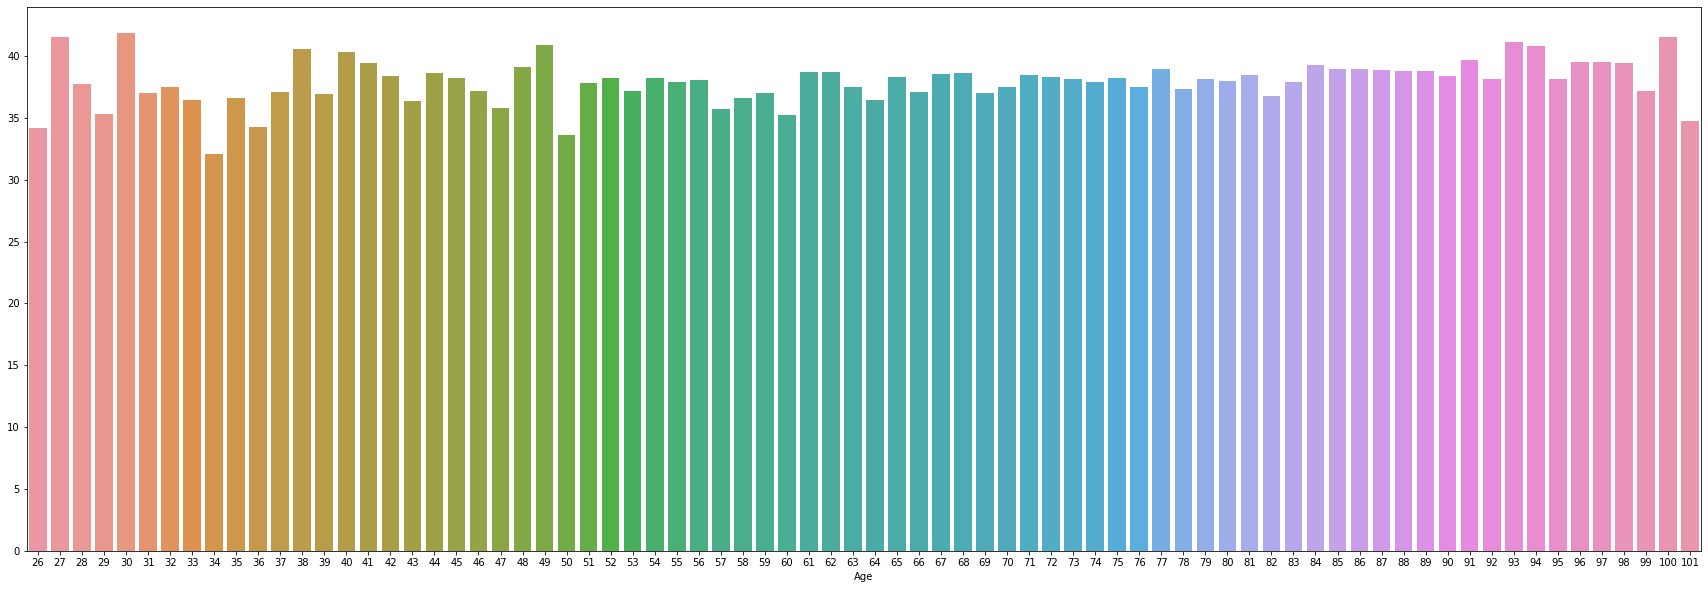

In [147]:
plt.figure(figsize=(30,10))
sns.barplot(x=(data_df_final[data_df_final['PotentialFraud']=='Yes'].groupby('Age').count()['PotentialFraud']/data_df_final.groupby('Age').count()['PotentialFraud']*100).index, \
            y=(data_df_final[data_df_final['PotentialFraud']=='Yes'].groupby('Age').count()['PotentialFraud']/data_df_final.groupby('Age').count()['PotentialFraud']*100).values)
plt.show()

#### However the things seems to be different if we take the percentage of population of every age. In this case the likelihood of the fraud seems almost same for all the age groups.

In [148]:
data_df_final[data_df_final['PotentialFraud']=='Yes'].groupby('is_dead').count()['PotentialFraud']

is_dead
0    211252
1      1544
Name: PotentialFraud, dtype: int64

In [149]:
data_df_final.groupby('is_dead').count()['PotentialFraud']

is_dead
0    554080
1      4131
Name: PotentialFraud, dtype: int64

In [150]:
(data_df_final[data_df_final['PotentialFraud']=='Yes'].groupby('is_dead').count()['PotentialFraud']/data_df_final.groupby('is_dead').count()['PotentialFraud'])*100

is_dead
0    38.126624
1    37.375938
Name: PotentialFraud, dtype: float64

### Analysing the Fraudulant activity on the basis of the fact whether person is dead or alive. Both are equally likely to be Fraudulant

## Difference between Claim Start Date and Claim End Date:<br>
### Now we will find the difference between claim end date and claim start date which will give us the number of days taken for the claim process to get completed

In [151]:
data_df_final['Claim Process Days'] = round(((data_df_final['ClaimEndDt'] - data_df_final['ClaimStartDt']).dt.days))+1

In [152]:
data_df_final['Claim Process Days'].value_counts()

1     453953
21     24458
2      16559
3      10485
4       9496
5       7231
6       5090
8       4774
7       4020
15      3197
9       2801
10      2532
11      1898
12      1681
13      1485
14      1465
17      1439
16      1363
18      1093
19      1012
20       901
36       331
22       149
23       121
24       104
25        80
28        77
29        71
27        69
26        67
30        42
33        40
34        37
31        36
35        28
32        24
37         2
Name: Claim Process Days, dtype: int64

In [153]:
data_df_final['Claim Process Days'].value_counts()/data_df_final.shape[0]

1     0.813228
21    0.043815
2     0.029664
3     0.018783
4     0.017011
5     0.012954
6     0.009118
8     0.008552
7     0.007202
15    0.005727
9     0.005018
10    0.004536
11    0.003400
12    0.003011
13    0.002660
14    0.002624
17    0.002578
16    0.002442
18    0.001958
19    0.001813
20    0.001614
36    0.000593
22    0.000267
23    0.000217
24    0.000186
25    0.000143
28    0.000138
29    0.000127
27    0.000124
26    0.000120
30    0.000075
33    0.000072
34    0.000066
31    0.000064
35    0.000050
32    0.000043
37    0.000004
Name: Claim Process Days, dtype: float64

#### Here we could see that most of the claims were process in a single day i.e around 82% of the claim compared to 37 days which is the highest number of days taken for the claim process to complete.

In [154]:
data_df_final.drop(['ClaimStartDt','ClaimEndDt'], axis=1,inplace=True)

In [155]:
(data_df_final[data_df_final['PotentialFraud']=='Yes'].groupby('Claim Process Days').count()['PotentialFraud']/data_df_final.groupby('Claim Process Days').count()['PotentialFraud']*100)

Claim Process Days
1      36.570306
2      43.082312
3      48.764902
4      52.306234
5      50.587747
6      51.001965
7      50.472637
8      45.643067
9      50.124955
10     45.300158
11     46.417281
12     45.389649
13     44.107744
14     44.232082
15     39.849859
16     43.286867
17     40.931202
18     41.354071
19     42.193676
20     42.397336
21     37.022651
22     63.087248
23     62.809917
24     70.192308
25     66.250000
26     67.164179
27     65.217391
28     63.636364
29     73.239437
30     61.904762
31     55.555556
32     70.833333
33     65.000000
34     54.054054
35     60.714286
36     68.277946
37    100.000000
Name: PotentialFraud, dtype: float64

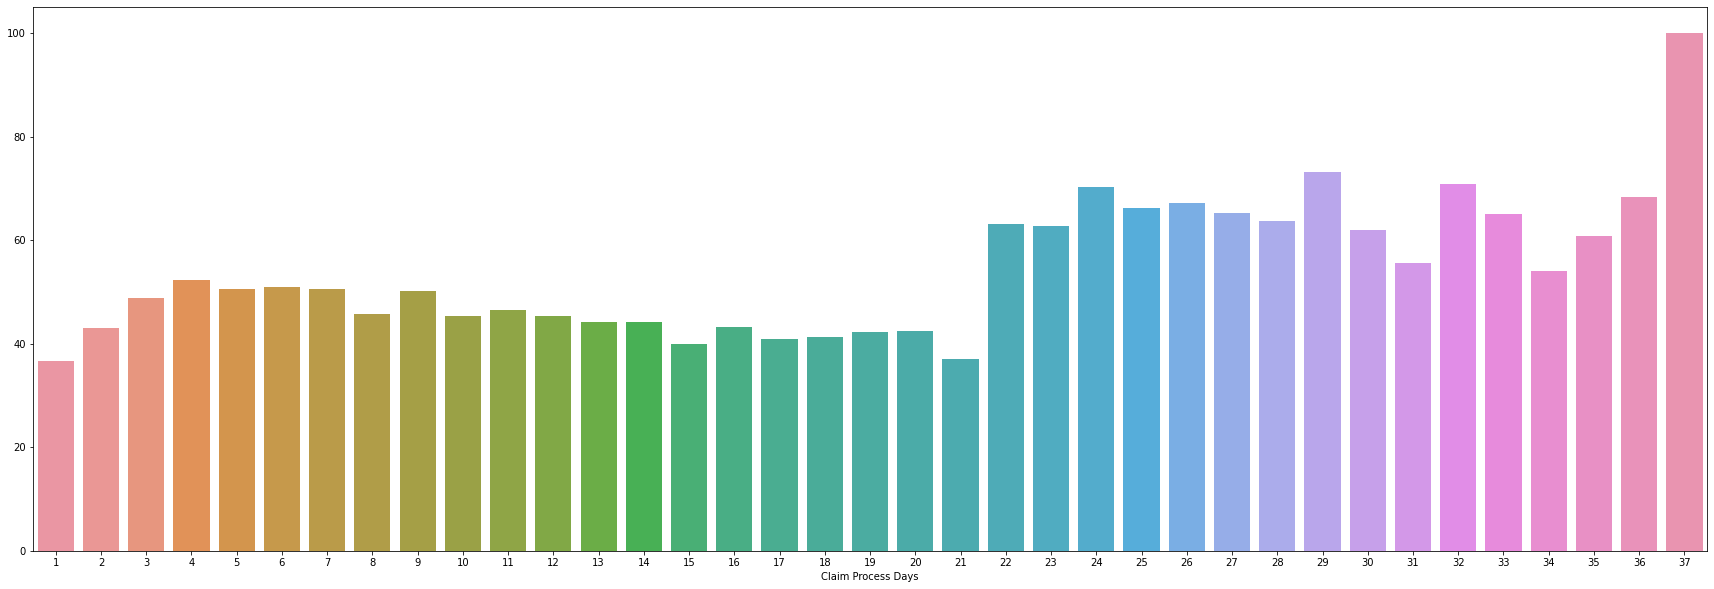

In [156]:
plt.figure(figsize=(30,10))
sns.barplot(x=(data_df_final[data_df_final['PotentialFraud']=='Yes'].groupby('Claim Process Days').count()['PotentialFraud']/data_df_final.groupby('Claim Process Days').count()['PotentialFraud']*100).index, \
            y=(data_df_final[data_df_final['PotentialFraud']=='Yes'].groupby('Claim Process Days').count()['PotentialFraud']/data_df_final.groupby('Claim Process Days').count()['PotentialFraud']*100).values)
plt.show()

#### From the above plot we could see that the chances of fraudulant activity increase as the number of days required for the claim to process increases. We could also see that the claim process taking more than 22 days are having very chances of being fraudulant

# Number of Date Admitted: Now we will try to create a new feature which will be the number of days the patient were admitted in the hospital which will be the difference of the (Date Discharged - Date Admitted) + 1.
# Also we know that for outpatient data the number of days admitted is 0 and it will be NaN. So we will replace that value will NaN

In [157]:
data_df_final['Days_Admitted'] = round(((data_df_final['DischargeDt'] - data_df_final['AdmissionDt']).dt.days))+1

In [158]:
data_df_final['Days_Admitted'] = data_df_final['Days_Admitted'].fillna(0)

In [159]:
data_df_final['Days_Admitted'].value_counts()

0.0     517737
4.0       6902
3.0       6117
5.0       4994
2.0       4591
6.0       3579
7.0       2719
8.0       2206
9.0       1613
10.0      1151
11.0       917
12.0       726
1.0        605
13.0       582
14.0       518
15.0       462
16.0       387
36.0       337
17.0       306
18.0       286
19.0       212
20.0       174
22.0       147
21.0       146
23.0       121
24.0       103
25.0        80
28.0        77
29.0        72
26.0        68
27.0        68
30.0        42
33.0        40
34.0        38
31.0        36
35.0        28
32.0        24
Name: Days_Admitted, dtype: int64

In [160]:
data_df_final[data_df_final['PotentialFraud']=='Yes'].groupby('Days_Admitted').count()['PotentialFraud']

Days_Admitted
0.0     189394
1.0        353
2.0       2724
3.0       3517
4.0       4019
5.0       2832
6.0       2023
7.0       1562
8.0       1230
9.0        972
10.0       651
11.0       513
12.0       401
13.0       320
14.0       308
15.0       266
16.0       224
17.0       173
18.0       158
19.0       131
20.0       105
21.0        77
22.0        93
23.0        76
24.0        72
25.0        53
26.0        46
27.0        44
28.0        49
29.0        53
30.0        26
31.0        20
32.0        17
33.0        26
34.0        21
35.0        17
36.0       230
Name: PotentialFraud, dtype: int64

In [161]:
data_df_final[data_df_final['PotentialFraud']=='Yes'].groupby('Days_Admitted').count()['PotentialFraud']/data_df_final.groupby('Days_Admitted').count()['PotentialFraud']

Days_Admitted
0.0     0.365811
1.0     0.583471
2.0     0.593335
3.0     0.574955
4.0     0.582295
5.0     0.567080
6.0     0.565242
7.0     0.574476
8.0     0.557570
9.0     0.602604
10.0    0.565595
11.0    0.559433
12.0    0.552342
13.0    0.549828
14.0    0.594595
15.0    0.575758
16.0    0.578811
17.0    0.565359
18.0    0.552448
19.0    0.617925
20.0    0.603448
21.0    0.527397
22.0    0.632653
23.0    0.628099
24.0    0.699029
25.0    0.662500
26.0    0.676471
27.0    0.647059
28.0    0.636364
29.0    0.736111
30.0    0.619048
31.0    0.555556
32.0    0.708333
33.0    0.650000
34.0    0.552632
35.0    0.607143
36.0    0.682493
Name: PotentialFraud, dtype: float64

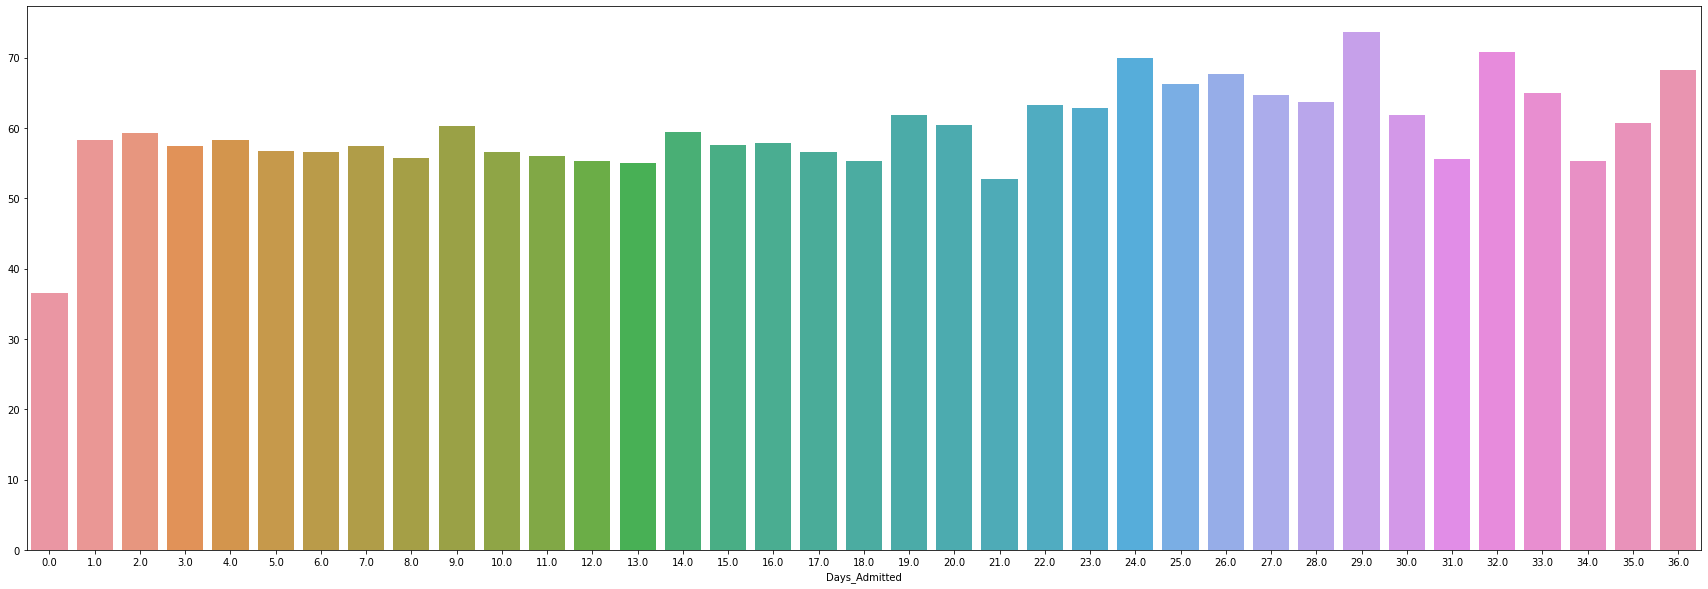

In [162]:
plt.figure(figsize=(30,10))
sns.barplot(x=(data_df_final[data_df_final['PotentialFraud']=='Yes'].groupby('Days_Admitted').count()['PotentialFraud']/data_df_final.groupby('Days_Admitted').count()['PotentialFraud']*100).index, \
            y=(data_df_final[data_df_final['PotentialFraud']=='Yes'].groupby('Days_Admitted').count()['PotentialFraud']/data_df_final.groupby('Days_Admitted').count()['PotentialFraud']*100).values)
plt.show()

#### From the above analysis we could see that the chances of the Fraudulent Activity is a bit higher when the number of days a patient was admitted was higher

In [163]:
data_df_final.drop(['DischargeDt','AdmissionDt'],axis=1,inplace=True)

In [164]:
data_df_final.isna().sum()

BeneID                                  0
ClaimID                                 0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10                553201
ClmProcedureCode_1                 534901
ClmProcedureCode_2                 552721
ClmProcedureCode_3                 557242
ClmProcedureCode_4                

In [165]:
data_df_final.isna().sum()/data_df_final.shape[0]

BeneID                             0.000000
ClaimID                            0.000000
Provider                           0.000000
InscClaimAmtReimbursed             0.000000
AttendingPhysician                 0.002701
OperatingPhysician                 0.794975
OtherPhysician                     0.642185
ClmAdmitDiagnosisCode              0.738631
DeductibleAmtPaid                  0.001611
DiagnosisGroupCode                 0.927493
ClmDiagnosisCode_1                 0.018726
ClmDiagnosisCode_2                 0.350416
ClmDiagnosisCode_3                 0.564582
ClmDiagnosisCode_4                 0.705244
ClmDiagnosisCode_5                 0.799495
ClmDiagnosisCode_6                 0.848817
ClmDiagnosisCode_7                 0.881448
ClmDiagnosisCode_8                 0.904258
ClmDiagnosisCode_9                 0.925091
ClmDiagnosisCode_10                0.991025
ClmProcedureCode_1                 0.958242
ClmProcedureCode_2                 0.990165
ClmProcedureCode_3              

In [166]:
list((data_df_final[data_df_final['AttendingPhysician'].isna()]['PotentialFraud']=='Yes').values).count(True)

564

## We thought of dropping the 1508 data points where 'Attending Physicians' were not having values but later on found out that out of those 1508, 564 data points were Potential Fraud which is around 37.4%. So this category also contribute similar trend to the Potential Fraud group. Therefore we will add a new value No_Physician (PHY00000) to fill up the null value

In [167]:
data_df_final['AttendingPhysician'] = data_df_final['AttendingPhysician'].fillna('PHY000000')

In [168]:
data_df_final['AttendingPhysician'].fillna('PHY000000').value_counts()

PHY330576    2534
PHY350277    1628
PHY000000    1508
PHY412132    1321
PHY423534    1223
             ... 
PHY346125       1
PHY393153       1
PHY408460       1
PHY336259       1
PHY429599       1
Name: AttendingPhysician, Length: 82064, dtype: int64

In [169]:
data_df_final.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,is_dead,Claim Process Days,Days_Admitted
count,558211.000000,557312.000000,23310.000000,5490.000000,969.000000,118.000000,9.000000,0.0,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.00000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,997.012133,78.421085,5896.154612,4106.358106,4221.123839,4070.262712,5269.444444,NaN,0.421162,1.149137,0.196786,25.446969,378.588195,11.931472,11.93877,0.401868,0.590427,0.412002,0.151385,0.312930,0.434807,0.705395,0.759265,0.317647,0.311171,0.101720,5227.971466,568.756807,2278.225348,649.698745,73.852368,0.007400,2.727940,0.483269
std,3821.534891,274.016812,3050.489933,2031.640878,2281.849885,2037.626990,2780.071632,NaN,0.493746,0.489777,0.397569,15.192784,265.215531,0.889712,0.78590,0.490276,0.491755,0.492196,0.358424,0.463687,0.495732,0.455866,0.427530,0.465562,0.462973,0.302279,11786.274732,1179.172616,3881.846386,1002.020811,13.020485,0.085707,4.904984,2.300583
min,0.000000,0.000000,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8000.000000,0.000000,-70.000000,0.000000,26.000000,0.000000,1.000000,0.000000
25%,40.000000,0.000000,3848.000000,2724.000000,2724.000000,2754.250000,4139.000000,NaN,0.000000,1.000000,0.000000,11.000000,150.000000,12.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,460.000000,120.000000,68.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,5363.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN,0.000000,1.000000,0.000000,24.000000,350.000000,12.000000,12.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1170.000000,340.000000,75.000000,0.000000,1.000000,0.000000
75%,300.000000,0.000000,8669.000000,4439.000000,5185.000000,4439.000000,5185.000000,NaN,1.000000,1.000000,0.000000,38.000000,570.000000,12.000000,12.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6000.000000,1068.000000,2590.000000,790.000000,83.000000,0.000000,1.000000,0.000000
max,125000.000000,1068.000000,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN,1.000000,3.000000,1.000000,54.000000,999.000000,12.000000,12.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,161470.000000,38272.000000,102960.000000,13840.000000,101.000000,1.000000,37.000000,36.000000


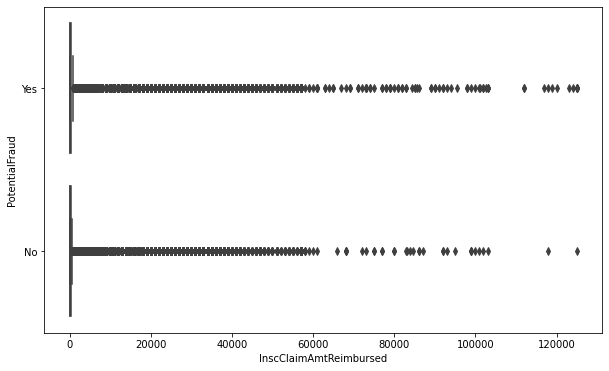

In [170]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data_df_final, x='InscClaimAmtReimbursed',y='PotentialFraud')
plt.show()

#### From the above boxplot it can be seen that if the InscClaimAmtReimbursed amount is greater than 60000, the chances of fraudulent is higher

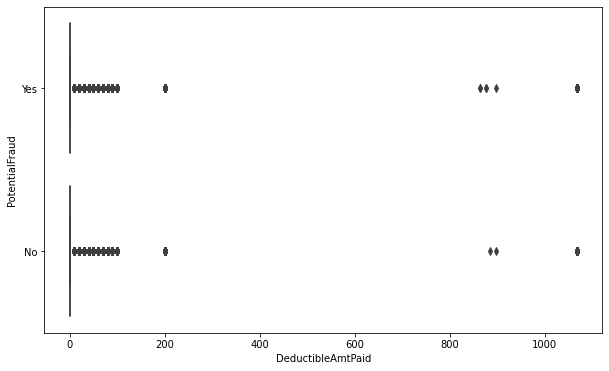

In [171]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data_df_final, x='DeductibleAmtPaid',y='PotentialFraud')
plt.show()

#### However we could not get much insight from the above boxplot based on the DeductibleAmtPaid.

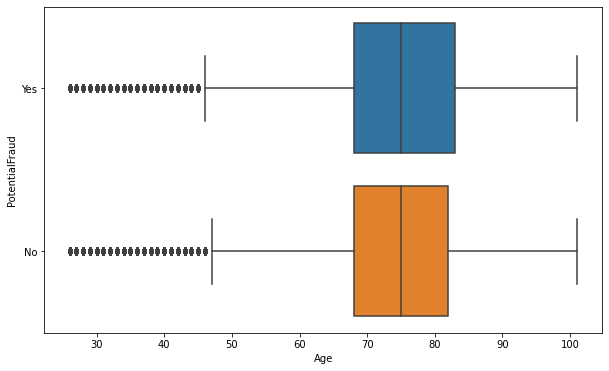

In [172]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data_df_final, x='Age',y='PotentialFraud')
plt.show()

### We already saw earlier with respect to Age the distinct Potential Fraud is very difficult to get identified. It is much more evedent now with respect to the boxplot above|

# State

In [173]:
data_df_final.groupby('State').count()['PotentialFraud']

State
1     10240
2       738
3      9344
4      7571
5     51350
6      7200
7      5617
8      1530
9       619
10    39073
11    17003
12     1706
13     2765
14    24417
15    14213
16     7457
17     4884
18    10322
19     7917
20     3833
21    11261
22    13624
23    21343
24     7726
25     6682
26    12911
27     1995
28     4168
29     1978
30     2654
31    15940
32     3456
33    35024
34    18905
35      940
36    21291
37     6990
38     5518
39    24251
41     1110
42    10491
43     2002
44    14418
45    34022
46     3381
47     1827
49    14997
50    11740
51     4644
52     9792
53     1098
54     4233
Name: PotentialFraud, dtype: int64

In [174]:
data_df_final[data_df_final['PotentialFraud']=='Yes'].groupby('State').count()['PotentialFraud']

State
1      3525
2       207
3      2030
4      1945
5     30335
6      3666
7      1470
8       612
9       178
10    17512
11     4123
12      308
13      858
14     8509
15     4635
16     2733
17     1016
18     1679
19     1687
20     1118
21     2576
22     7798
23     8538
24     3453
25      819
26     5301
27      576
28      516
29      429
30     1184
31     9112
32     1739
33    17492
34     4385
35       82
36     6381
37     1780
38      770
39    11448
41      156
42     3180
43      316
44     6709
45    10135
46     2124
47      402
49     8613
50     4782
51      466
52     1953
53      478
54      957
Name: PotentialFraud, dtype: int64

In [175]:
data_df_final[data_df_final['PotentialFraud']=='Yes'].groupby('State').count()['PotentialFraud']/data_df_final.groupby('State').count()['PotentialFraud']

State
1     0.344238
2     0.280488
3     0.217252
4     0.256901
5     0.590750
6     0.509167
7     0.261706
8     0.400000
9     0.287561
10    0.448187
11    0.242487
12    0.180539
13    0.310307
14    0.348487
15    0.326110
16    0.366501
17    0.208026
18    0.162662
19    0.213086
20    0.291678
21    0.228754
22    0.572372
23    0.400037
24    0.446932
25    0.122568
26    0.410580
27    0.288722
28    0.123800
29    0.216886
30    0.446119
31    0.571644
32    0.503183
33    0.499429
34    0.231949
35    0.087234
36    0.299704
37    0.254649
38    0.139543
39    0.472063
41    0.140541
42    0.303117
43    0.157842
44    0.465321
45    0.297895
46    0.628217
47    0.220033
49    0.574315
50    0.407325
51    0.100345
52    0.199449
53    0.435337
54    0.226081
Name: PotentialFraud, dtype: float64

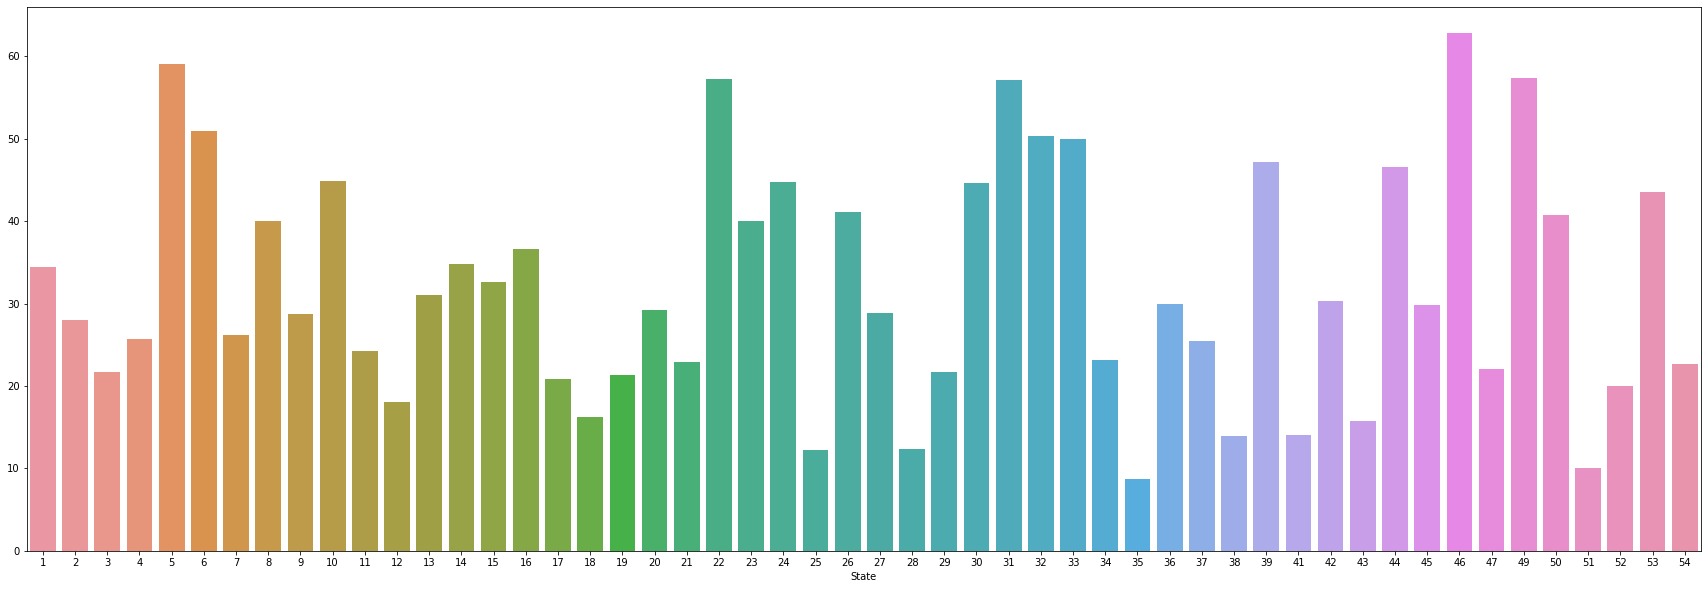

In [176]:
plt.figure(figsize=(30,10))
sns.barplot(x=(data_df_final[data_df_final['PotentialFraud']=='Yes'].groupby('State').count()['PotentialFraud']/data_df_final.groupby('State').count()['PotentialFraud']*100).index, \
            y=(data_df_final[data_df_final['PotentialFraud']=='Yes'].groupby('State').count()['PotentialFraud']/data_df_final.groupby('State').count()['PotentialFraud']*100).values)
plt.show()

#### From the above plot we could see that the states 5,22,31,46 and 49 have a very high chances of the fraudulent activity. We could see that these states are having a fraudulent chances of around 50%.

In [177]:
data_df_final.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'Chr

In [178]:
corr_of_disease = data_df_final[['ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression',\
               'ChronicCond_Diabetes','ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke']].corr()

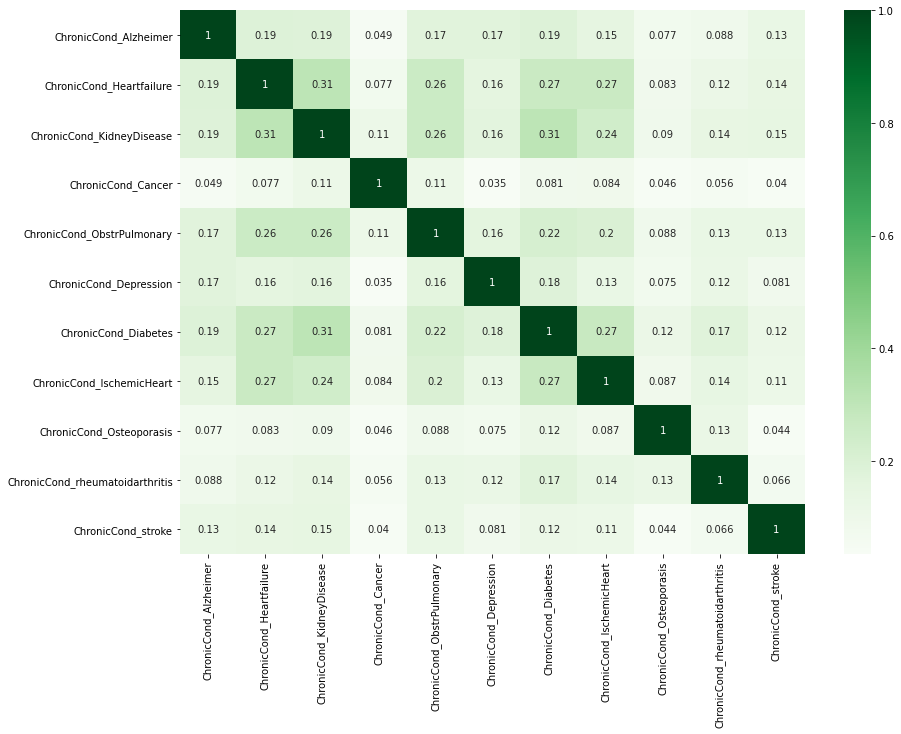

In [179]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_of_disease, cmap='Greens',annot=True)
plt.show()

#### However we are not able to see very much high correlation between the diseases. Those which are a bit correlated are a) "ChronicCond_Diabetes" and "ChronicCond_KidneyDisease" b) "ChronicCond_Heartfailure" and "ChronicCond_KidneyDisease" with a correlation value of more than 0.31

In [180]:
data_df_final.isna().sum()

BeneID                                  0
ClaimID                                 0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                      0
OperatingPhysician                 443764
OtherPhysician                     358475
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10                553201
ClmProcedureCode_1                 534901
ClmProcedureCode_2                 552721
ClmProcedureCode_3                 557242
ClmProcedureCode_4                

In [181]:
data_df_final.OperatingPhysician = data_df_final.OperatingPhysician.fillna(0).apply(lambda x:0 if x==0 else 1)

In [182]:
#data_df_final.OtherPhysician = data_df_final.OperatingPhysician.apply(lambda x:x==0 if x is val else 1).map({False:0,1:1})
data_df_final.OtherPhysician = data_df_final.OtherPhysician.fillna(0).apply(lambda x:0 if x==0 else 1)

In [183]:
data_df_final.OperatingPhysician.value_counts()

0    443764
1    114447
Name: OperatingPhysician, dtype: int64

In [184]:
data_df_final['has_Physician'] = (data_df_final.OperatingPhysician + data_df_final.OtherPhysician).apply(lambda x:0 if x==0 else 1)

In [185]:
data_df_final.drop(['OperatingPhysician','OtherPhysician'],axis=1,inplace=True)

In [186]:
data_df_final.drop(['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'],axis=1,inplace=True)

In [187]:
data_df_final.ClmAdmitDiagnosisCode = data_df_final.ClmAdmitDiagnosisCode.fillna(0).apply(lambda x:0 if x==0 else 1)
data_df_final.DiagnosisGroupCode = data_df_final.ClmAdmitDiagnosisCode.fillna(0).apply(lambda x:0 if x==0 else 1)

In [188]:
data_df_final.ClmDiagnosisCode_1 = data_df_final.ClmDiagnosisCode_1.fillna(0).apply(lambda x:0 if x==0 else 1)
data_df_final.ClmDiagnosisCode_2 = data_df_final.ClmDiagnosisCode_2.fillna(0).apply(lambda x:0 if x==0 else 1)
data_df_final.ClmDiagnosisCode_3 = data_df_final.ClmDiagnosisCode_3.fillna(0).apply(lambda x:0 if x==0 else 1)
data_df_final.ClmDiagnosisCode_4 = data_df_final.ClmDiagnosisCode_4.fillna(0).apply(lambda x:0 if x==0 else 1)
data_df_final.ClmDiagnosisCode_5 = data_df_final.ClmDiagnosisCode_5.fillna(0).apply(lambda x:0 if x==0 else 1)
data_df_final.ClmDiagnosisCode_6 = data_df_final.ClmDiagnosisCode_6.fillna(0).apply(lambda x:0 if x==0 else 1)
data_df_final.ClmDiagnosisCode_7 = data_df_final.ClmDiagnosisCode_7.fillna(0).apply(lambda x:0 if x==0 else 1)
data_df_final.ClmDiagnosisCode_8 = data_df_final.ClmDiagnosisCode_8.fillna(0).apply(lambda x:0 if x==0 else 1)
data_df_final.ClmDiagnosisCode_9 = data_df_final.ClmDiagnosisCode_9.fillna(0).apply(lambda x:0 if x==0 else 1)
data_df_final.ClmDiagnosisCode_10 = data_df_final.ClmDiagnosisCode_10.fillna(0).apply(lambda x:0 if x==0 else 1)

In [189]:
data_df_final['Number_Of_Diagnosis'] = data_df_final.ClmDiagnosisCode_1 + data_df_final.ClmDiagnosisCode_2 + data_df_final.ClmDiagnosisCode_3 + data_df_final.ClmDiagnosisCode_4 +\
                                       data_df_final.ClmDiagnosisCode_5 + data_df_final.ClmDiagnosisCode_6 + data_df_final.ClmDiagnosisCode_7 + data_df_final.ClmDiagnosisCode_8 +\
                                       data_df_final.ClmDiagnosisCode_9 + data_df_final.ClmDiagnosisCode_10 + data_df_final.ClmAdmitDiagnosisCode + data_df_final.DiagnosisGroupCode

In [190]:
data_df_final.drop(['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',\
                    'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode'],axis=1, inplace=True)

In [191]:
data_df_final.DeductibleAmtPaid.fillna(np.percentile(np.array(data_df_final.DeductibleAmtPaid.fillna(0)), 90),inplace=True)

In [192]:
data_df_final.isna().sum()

BeneID                             0
ClaimID                            0
Provider                           0
InscClaimAmtReimbursed             0
AttendingPhysician                 0
DeductibleAmtPaid                  0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
O

In [193]:
data_df_final.PotentialFraud = data_df_final.PotentialFraud.apply(lambda x:1 if x=='Yes' else 0)

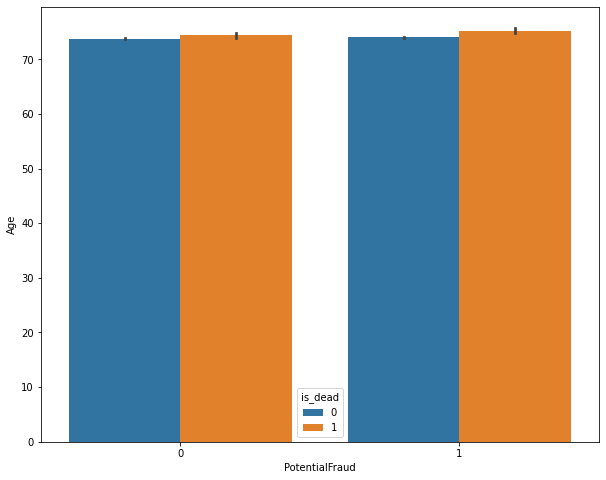

In [194]:
plt.figure(figsize=(10,8))
sns.barplot(x='PotentialFraud',y='Age',data=data_df_final,hue='is_dead')
plt.show()

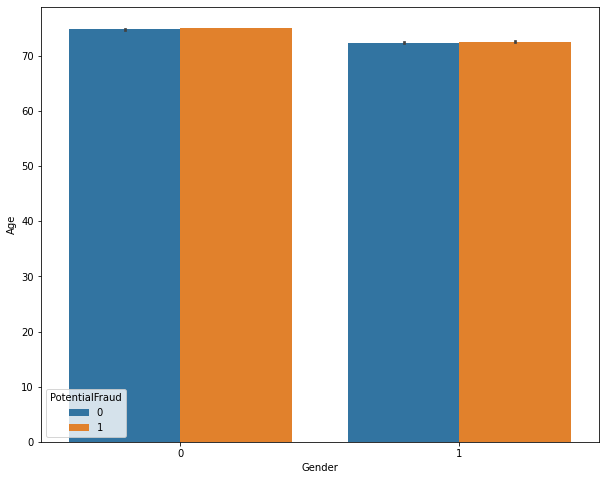

In [210]:
plt.figure(figsize=(10,8))
sns.barplot(x='Gender',y='Age',data=data_df_final,hue='PotentialFraud')
plt.show()

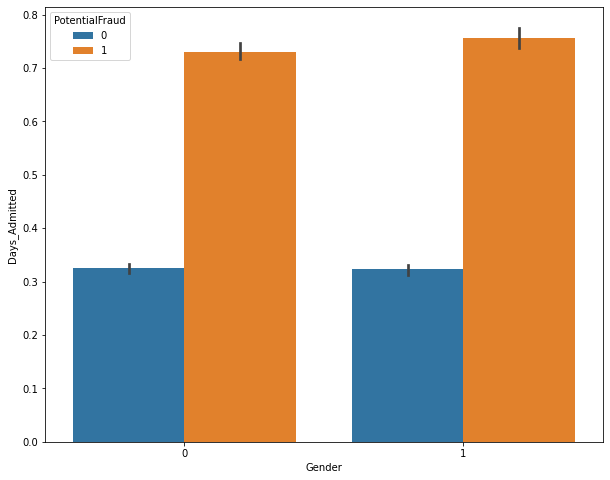

In [211]:
plt.figure(figsize=(10,8))
sns.barplot(x='Gender', y='Days_Admitted', data=data_df_final,hue='PotentialFraud')
plt.show()

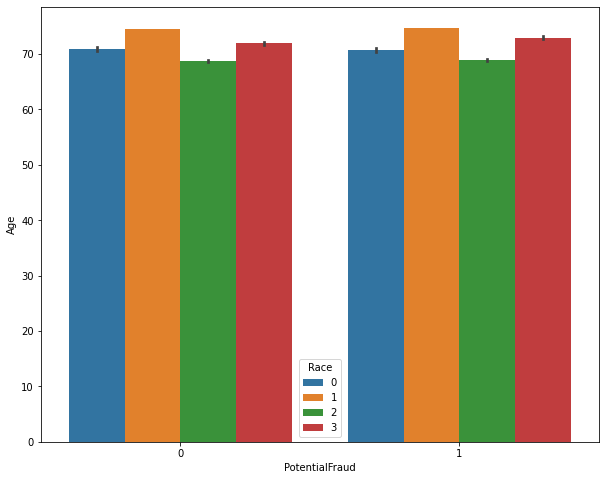

In [196]:
plt.figure(figsize=(10,8))
sns.barplot(x='PotentialFraud',y='Age',data=data_df_final,hue='Race')
plt.show()

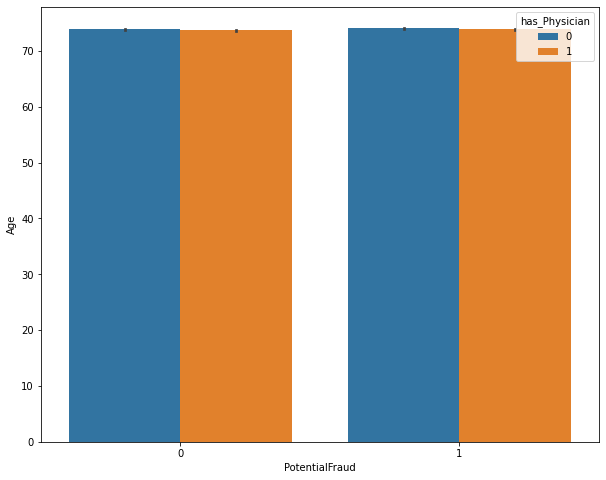

In [200]:
plt.figure(figsize=(10,8))
sns.barplot(x='PotentialFraud',y='Age',data=data_df_final,hue='has_Physician')
plt.show()

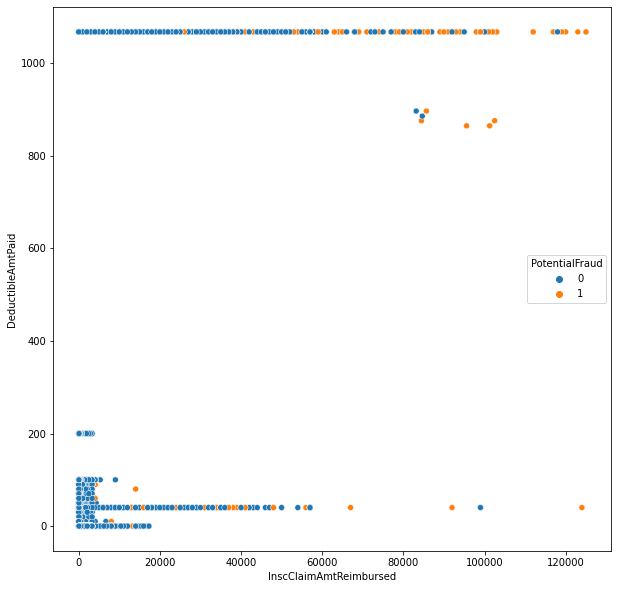

In [203]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='InscClaimAmtReimbursed',y='DeductibleAmtPaid',data=data_df_final,hue='PotentialFraud')
plt.show()